In [1]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from sklearn.preprocessing import MinMaxScaler

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Data import class
class TrainDataset(Dataset):
    
    def __init__(self, xy, track=50):
        #data loading
        x0 = torch.from_numpy(xy[:,1:])
        self.n_samples = xy.shape[0]
        self.y = torch.from_numpy(xy[:,[0]]).float()
        self.x = torch.zeros(x0.shape[0], track, x0.shape[1]) # blank tensor for multi-rows of tracking number (say 50)
        for i in range(x0.shape[0]-track): # loop for allocation of past x of tracking number (say 50)
            self.x[i] = x0[i+1:i+1+track]
    
    def __getitem__(self,index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.n_samples

# Data import class
class TestDataset(Dataset):
    
    def __init__(self, xy, track=50):
        #data loading
        x0 = torch.from_numpy(xy[:,1:])
        self.n_samples = xy.shape[0]
        y0 = torch.from_numpy(xy[:,[0]]).float()
        self.y = np.insert(y0,0,y0[0])[:-1] # since we don't know tomorrow's stock, put it same as today
        self.x = torch.zeros(x0.shape[0], track, x0.shape[1]) # blank tensor for multi-rows of tracking number (say 50)
        for i in range(x0.shape[0]-track): # loop for allocation of past x of tracking number (say 50)
            self.x[i] = x0[i+0:i+0+track]
    
    def __getitem__(self,index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.n_samples

# Model class
class NeuralNet(nn.Module):
    def __init__(self, ni, h1, h2, h3, h4, no):
        super(NeuralNet,self).__init__()
        self.input_size = ni
        self.l1 = nn.Linear(ni, h1)
        self.bn1 = nn.BatchNorm1d(h1)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(h1,h2)
        self.bn2 = nn.BatchNorm1d(h2)
        self.l3 = nn.Linear(h2,h3)
        self.bn3 = nn.BatchNorm1d(h3)
        self.l4 = nn.Linear(h3,h4)
        self.bn4 = nn.BatchNorm1d(h4)
        self.l5 = nn.Linear(h4,no)
    
    def forward(self, x):
        out = self.l1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.l2(out)
        out = self.bn2(out)
        out = self.relu(out)
        out = self.l3(out) # No softmax(relu)
        out = self.relu(out)
        out = self.l4(out)
        out = self.relu(out)
        out = self.l5(out)
        return out

# move column ath to bth
def movecol(df, a, b):
    col = df.columns.tolist()
    pop = col.pop(a)
    col2 = col[:b] + [pop] + col[b:]
    return df[col2]

Epoch [10/50], Step [1/3], Loss: 0.27375
Epoch [10/50], Step [2/3], Loss: 0.26037
Epoch [10/50], Step [3/3], Loss: 0.32783
Epoch [20/50], Step [1/3], Loss: 0.14541
Epoch [20/50], Step [2/3], Loss: 0.06798
Epoch [20/50], Step [3/3], Loss: 0.07891
Epoch [30/50], Step [1/3], Loss: 0.07549
Epoch [30/50], Step [2/3], Loss: 0.05500
Epoch [30/50], Step [3/3], Loss: 0.04609
Epoch [40/50], Step [1/3], Loss: 0.04749
Epoch [40/50], Step [2/3], Loss: 0.03446
Epoch [40/50], Step [3/3], Loss: 0.03465
Epoch [50/50], Step [1/3], Loss: 0.02052
Epoch [50/50], Step [2/3], Loss: 0.04369
Epoch [50/50], Step [3/3], Loss: 0.02467


C:\Users\DL\Anaconda3\lib\site-packages\torch\serialization.py:360: UserWarning: Couldn't retrieve source code for container of type NeuralNet. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\DL\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\DL\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplo

Epoch [10/50], Step [1/3], Loss: 0.26077
Epoch [10/50], Step [2/3], Loss: 0.24228
Epoch [10/50], Step [3/3], Loss: 0.18863
Epoch [20/50], Step [1/3], Loss: 0.04924
Epoch [20/50], Step [2/3], Loss: 0.03815
Epoch [20/50], Step [3/3], Loss: 0.09431
Epoch [30/50], Step [1/3], Loss: 0.01882
Epoch [30/50], Step [2/3], Loss: 0.07033
Epoch [30/50], Step [3/3], Loss: 0.03498
Epoch [40/50], Step [1/3], Loss: 0.04660
Epoch [40/50], Step [2/3], Loss: 0.03263
Epoch [40/50], Step [3/3], Loss: 0.02904
Epoch [50/50], Step [1/3], Loss: 0.03287
Epoch [50/50], Step [2/3], Loss: 0.02371
Epoch [50/50], Step [3/3], Loss: 0.02191


C:\Users\DL\Anaconda3\lib\site-packages\torch\serialization.py:360: UserWarning: Couldn't retrieve source code for container of type NeuralNet. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\DL\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Epoch [10/50], Step [1/3], Loss: 0.05259
Epoch [10/50], Step [2/3], Loss: 0.10193
Epoch [10/50], Step [3/3], Loss: 0.12217
Epoch [20/50], Step [1/3], Loss: 0.02677
Epoch [20/50], Step [2/3], Loss: 0.03801
Epoch [20/50], Step [3/3], Loss: 0.02078
Epoch [30/50], Step [1/3], Loss: 0.02369
Epoch [30/50], Step [2/3], Loss: 0.02263
Epoch [30/50], Step [3/3], Loss: 0.00544
Epoch [40/50], Step [1/3], Loss: 0.00700
Epoch [40/50], Step [2/3], Loss: 0.01986
Epoch [40/50], Step [3/3], Loss: 0.03995
Epoch [50/50], Step [1/3], Loss: 0.01175
Epoch [50/50], Step [2/3], Loss: 0.03146
Epoch [50/50], Step [3/3], Loss: 0.00716


C:\Users\DL\Anaconda3\lib\site-packages\torch\serialization.py:360: UserWarning: Couldn't retrieve source code for container of type NeuralNet. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\DL\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Epoch [10/50], Step [1/3], Loss: 0.24699
Epoch [10/50], Step [2/3], Loss: 0.31058
Epoch [10/50], Step [3/3], Loss: 0.31422
Epoch [20/50], Step [1/3], Loss: 0.13406
Epoch [20/50], Step [2/3], Loss: 0.13574
Epoch [20/50], Step [3/3], Loss: 0.11156
Epoch [30/50], Step [1/3], Loss: 0.09576
Epoch [30/50], Step [2/3], Loss: 0.08625
Epoch [30/50], Step [3/3], Loss: 0.03454
Epoch [40/50], Step [1/3], Loss: 0.02560
Epoch [40/50], Step [2/3], Loss: 0.04982
Epoch [40/50], Step [3/3], Loss: 0.09844
Epoch [50/50], Step [1/3], Loss: 0.02821
Epoch [50/50], Step [2/3], Loss: 0.04825
Epoch [50/50], Step [3/3], Loss: 0.03617


C:\Users\DL\Anaconda3\lib\site-packages\torch\serialization.py:360: UserWarning: Couldn't retrieve source code for container of type NeuralNet. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\DL\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Epoch [10/50], Step [1/3], Loss: 0.22853
Epoch [10/50], Step [2/3], Loss: 0.24932
Epoch [10/50], Step [3/3], Loss: 0.20430
Epoch [20/50], Step [1/3], Loss: 0.04630
Epoch [20/50], Step [2/3], Loss: 0.04171
Epoch [20/50], Step [3/3], Loss: 0.07196
Epoch [30/50], Step [1/3], Loss: 0.02123
Epoch [30/50], Step [2/3], Loss: 0.04560
Epoch [30/50], Step [3/3], Loss: 0.03109
Epoch [40/50], Step [1/3], Loss: 0.01334
Epoch [40/50], Step [2/3], Loss: 0.06526
Epoch [40/50], Step [3/3], Loss: 0.03625
Epoch [50/50], Step [1/3], Loss: 0.01113
Epoch [50/50], Step [2/3], Loss: 0.03475
Epoch [50/50], Step [3/3], Loss: 0.04314


C:\Users\DL\Anaconda3\lib\site-packages\torch\serialization.py:360: UserWarning: Couldn't retrieve source code for container of type NeuralNet. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\DL\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Epoch [10/50], Step [1/3], Loss: 0.24791
Epoch [10/50], Step [2/3], Loss: 0.23184
Epoch [10/50], Step [3/3], Loss: 0.23874
Epoch [20/50], Step [1/3], Loss: 0.10957
Epoch [20/50], Step [2/3], Loss: 0.10256
Epoch [20/50], Step [3/3], Loss: 0.05649
Epoch [30/50], Step [1/3], Loss: 0.06537
Epoch [30/50], Step [2/3], Loss: 0.03614
Epoch [30/50], Step [3/3], Loss: 0.05914
Epoch [40/50], Step [1/3], Loss: 0.04873
Epoch [40/50], Step [2/3], Loss: 0.05898
Epoch [40/50], Step [3/3], Loss: 0.06765
Epoch [50/50], Step [1/3], Loss: 0.05003
Epoch [50/50], Step [2/3], Loss: 0.04329
Epoch [50/50], Step [3/3], Loss: 0.05490


C:\Users\DL\Anaconda3\lib\site-packages\torch\serialization.py:360: UserWarning: Couldn't retrieve source code for container of type NeuralNet. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\DL\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Epoch [10/50], Step [1/3], Loss: 0.14477
Epoch [10/50], Step [2/3], Loss: 0.21689
Epoch [10/50], Step [3/3], Loss: 0.17841
Epoch [20/50], Step [1/3], Loss: 0.09049
Epoch [20/50], Step [2/3], Loss: 0.04986
Epoch [20/50], Step [3/3], Loss: 0.06310
Epoch [30/50], Step [1/3], Loss: 0.03633
Epoch [30/50], Step [2/3], Loss: 0.02648
Epoch [30/50], Step [3/3], Loss: 0.03277
Epoch [40/50], Step [1/3], Loss: 0.03699
Epoch [40/50], Step [2/3], Loss: 0.01303
Epoch [40/50], Step [3/3], Loss: 0.05396
Epoch [50/50], Step [1/3], Loss: 0.01866
Epoch [50/50], Step [2/3], Loss: 0.03504
Epoch [50/50], Step [3/3], Loss: 0.02900


C:\Users\DL\Anaconda3\lib\site-packages\torch\serialization.py:360: UserWarning: Couldn't retrieve source code for container of type NeuralNet. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\DL\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Epoch [10/50], Step [1/3], Loss: 0.42907
Epoch [10/50], Step [2/3], Loss: 0.47481
Epoch [10/50], Step [3/3], Loss: 0.44162
Epoch [20/50], Step [1/3], Loss: 0.20374
Epoch [20/50], Step [2/3], Loss: 0.22059
Epoch [20/50], Step [3/3], Loss: 0.21136
Epoch [30/50], Step [1/3], Loss: 0.11298
Epoch [30/50], Step [2/3], Loss: 0.09537
Epoch [30/50], Step [3/3], Loss: 0.05657
Epoch [40/50], Step [1/3], Loss: 0.11319
Epoch [40/50], Step [2/3], Loss: 0.05194
Epoch [40/50], Step [3/3], Loss: 0.04130
Epoch [50/50], Step [1/3], Loss: 0.05809
Epoch [50/50], Step [2/3], Loss: 0.09575
Epoch [50/50], Step [3/3], Loss: 0.03217


C:\Users\DL\Anaconda3\lib\site-packages\torch\serialization.py:360: UserWarning: Couldn't retrieve source code for container of type NeuralNet. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\DL\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Epoch [10/50], Step [1/3], Loss: 0.71696
Epoch [10/50], Step [2/3], Loss: 0.64892
Epoch [10/50], Step [3/3], Loss: 0.47315
Epoch [20/50], Step [1/3], Loss: 0.29371
Epoch [20/50], Step [2/3], Loss: 0.14541
Epoch [20/50], Step [3/3], Loss: 0.19376
Epoch [30/50], Step [1/3], Loss: 0.06936
Epoch [30/50], Step [2/3], Loss: 0.21268
Epoch [30/50], Step [3/3], Loss: 0.07817
Epoch [40/50], Step [1/3], Loss: 0.07496
Epoch [40/50], Step [2/3], Loss: 0.04189
Epoch [40/50], Step [3/3], Loss: 0.07484
Epoch [50/50], Step [1/3], Loss: 0.04463
Epoch [50/50], Step [2/3], Loss: 0.04821
Epoch [50/50], Step [3/3], Loss: 0.05270


C:\Users\DL\Anaconda3\lib\site-packages\torch\serialization.py:360: UserWarning: Couldn't retrieve source code for container of type NeuralNet. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\DL\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Epoch [10/50], Step [1/3], Loss: 0.62351
Epoch [10/50], Step [2/3], Loss: 0.62037
Epoch [10/50], Step [3/3], Loss: 0.75558
Epoch [20/50], Step [1/3], Loss: 0.16230
Epoch [20/50], Step [2/3], Loss: 0.25014
Epoch [20/50], Step [3/3], Loss: 0.27525
Epoch [30/50], Step [1/3], Loss: 0.18740
Epoch [30/50], Step [2/3], Loss: 0.20342
Epoch [30/50], Step [3/3], Loss: 0.10183
Epoch [40/50], Step [1/3], Loss: 0.06857
Epoch [40/50], Step [2/3], Loss: 0.09156
Epoch [40/50], Step [3/3], Loss: 0.11422
Epoch [50/50], Step [1/3], Loss: 0.05897
Epoch [50/50], Step [2/3], Loss: 0.12299
Epoch [50/50], Step [3/3], Loss: 0.26845


C:\Users\DL\Anaconda3\lib\site-packages\torch\serialization.py:360: UserWarning: Couldn't retrieve source code for container of type NeuralNet. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\DL\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Epoch [10/50], Step [1/3], Loss: 0.12887
Epoch [10/50], Step [2/3], Loss: 0.12238
Epoch [10/50], Step [3/3], Loss: 0.17517
Epoch [20/50], Step [1/3], Loss: 0.04198
Epoch [20/50], Step [2/3], Loss: 0.02494
Epoch [20/50], Step [3/3], Loss: 0.03260
Epoch [30/50], Step [1/3], Loss: 0.01330
Epoch [30/50], Step [2/3], Loss: 0.01483
Epoch [30/50], Step [3/3], Loss: 0.03242
Epoch [40/50], Step [1/3], Loss: 0.01290
Epoch [40/50], Step [2/3], Loss: 0.02369
Epoch [40/50], Step [3/3], Loss: 0.03290
Epoch [50/50], Step [1/3], Loss: 0.02628
Epoch [50/50], Step [2/3], Loss: 0.00519
Epoch [50/50], Step [3/3], Loss: 0.00677


C:\Users\DL\Anaconda3\lib\site-packages\torch\serialization.py:360: UserWarning: Couldn't retrieve source code for container of type NeuralNet. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\DL\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,amazon,apple,cocacola,facebook,google,intel,microsoft,netflix,nvidia,tesla,walmart
datetime,,,,,,,,,,,
2020-05-06,1.66,0.04,-0.70,1.12,0.99,-0.53,-0.54,1.06,0.49,1.19,-0.22
2020-05-05,0.11,1.47,0.70,0.85,1.93,1.46,1.23,-1.64,0.73,0.95,0.74
2020-05-04,1.59,1.35,-1.08,1.54,0.64,1.05,2.57,3.14,2.79,8.07,0.35
2020-05-01,-7.14,-1.64,-0.61,-1.29,-2.10,-4.01,-2.64,-1.27,-3.07,-10.15,1.04
2020-04-30,4.52,2.02,-2.72,6.00,0.62,-3.05,1.10,2.39,-2.15,-2.52,-1.84


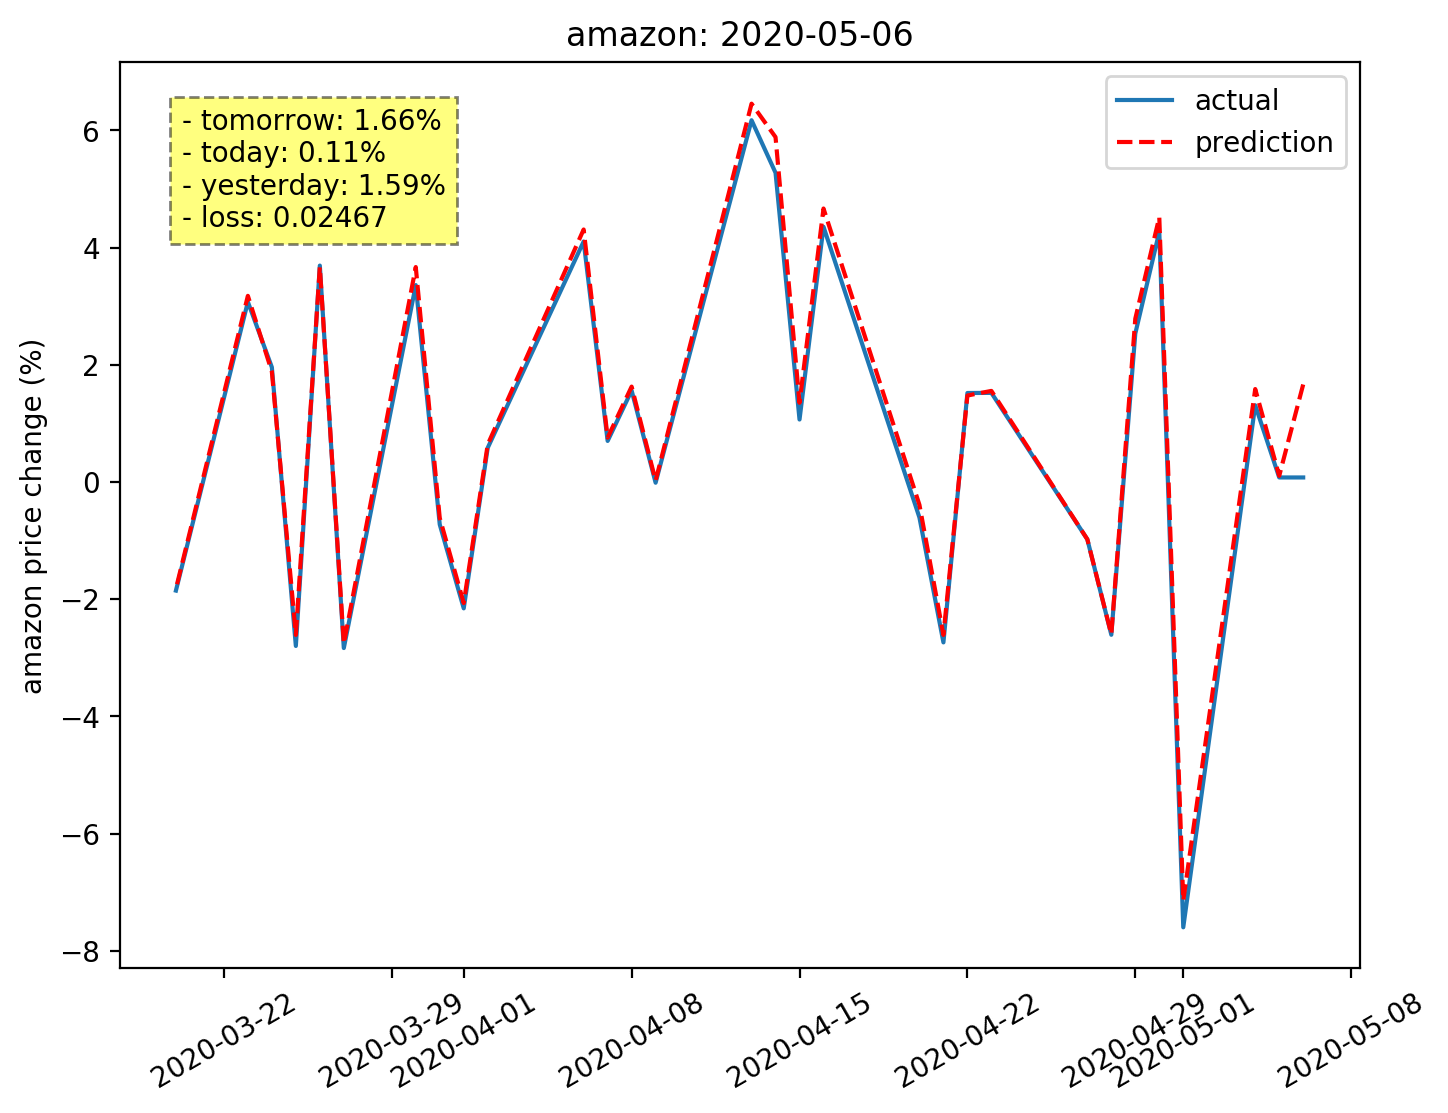

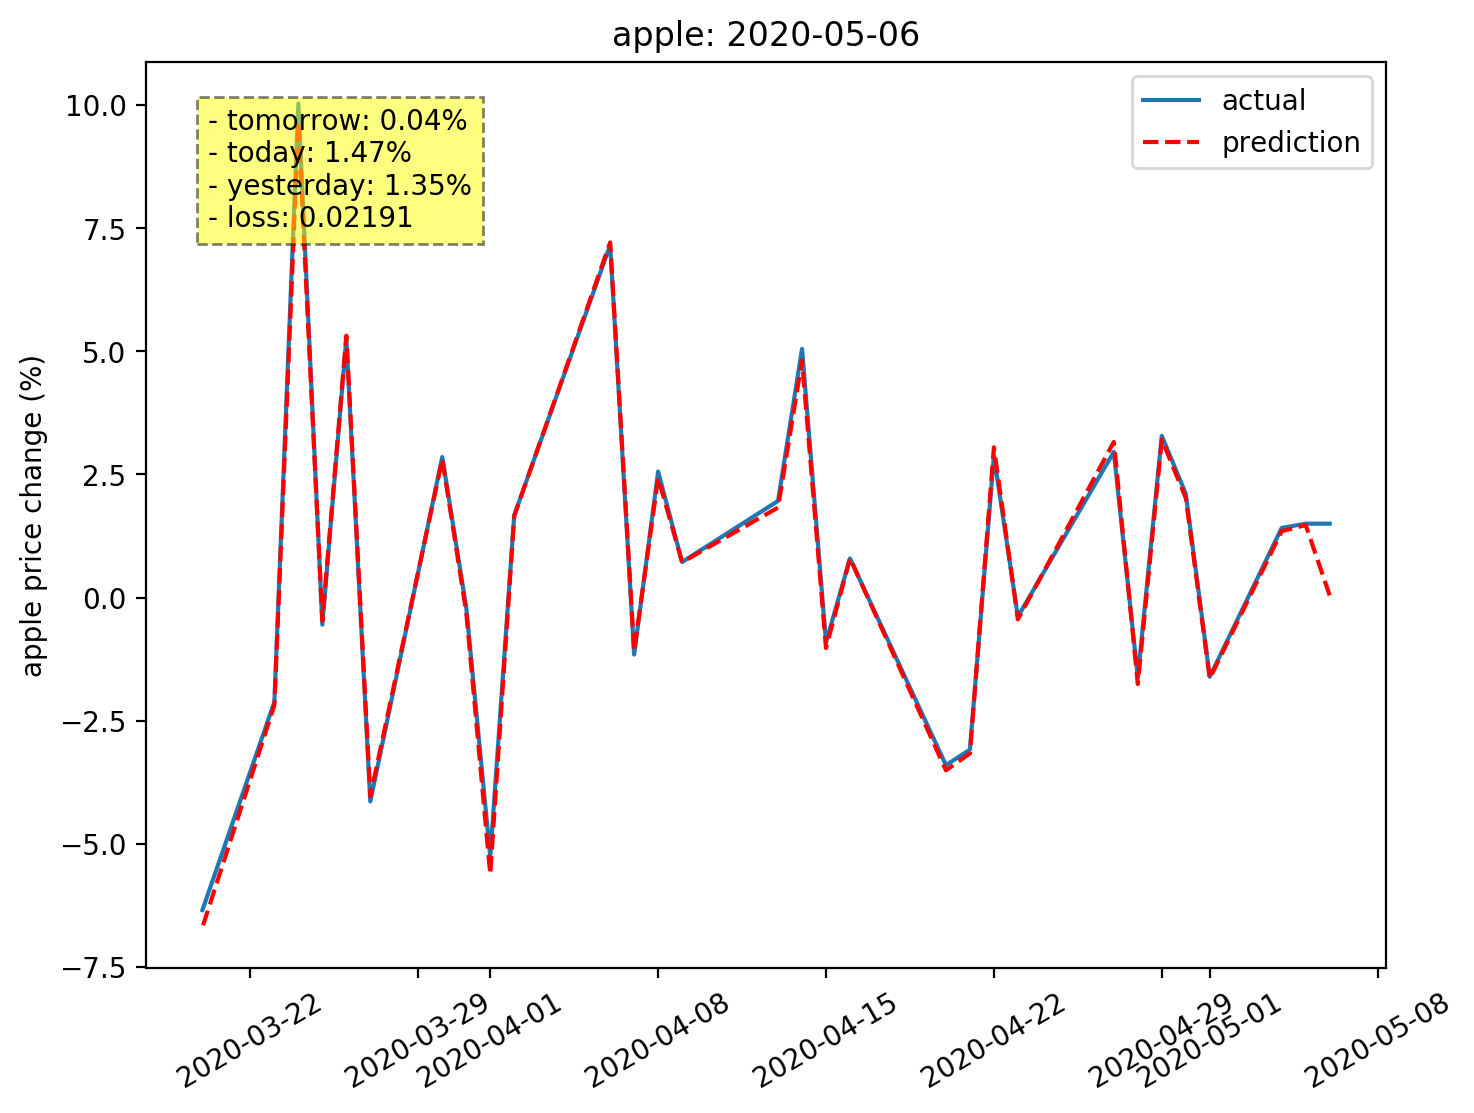

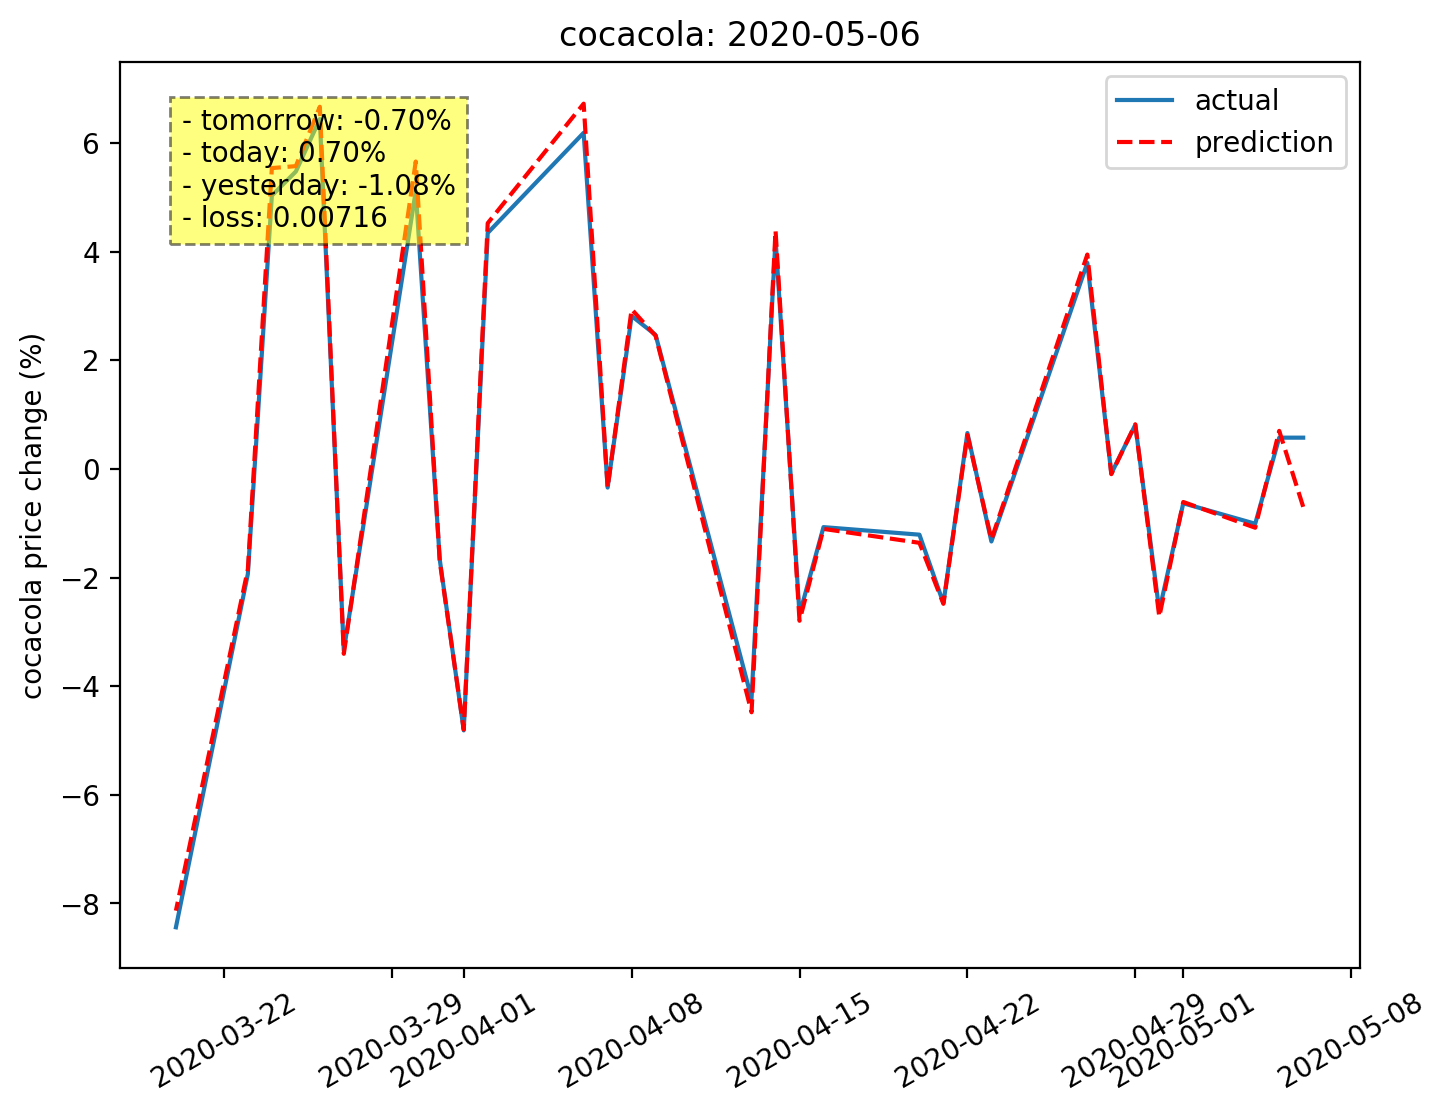

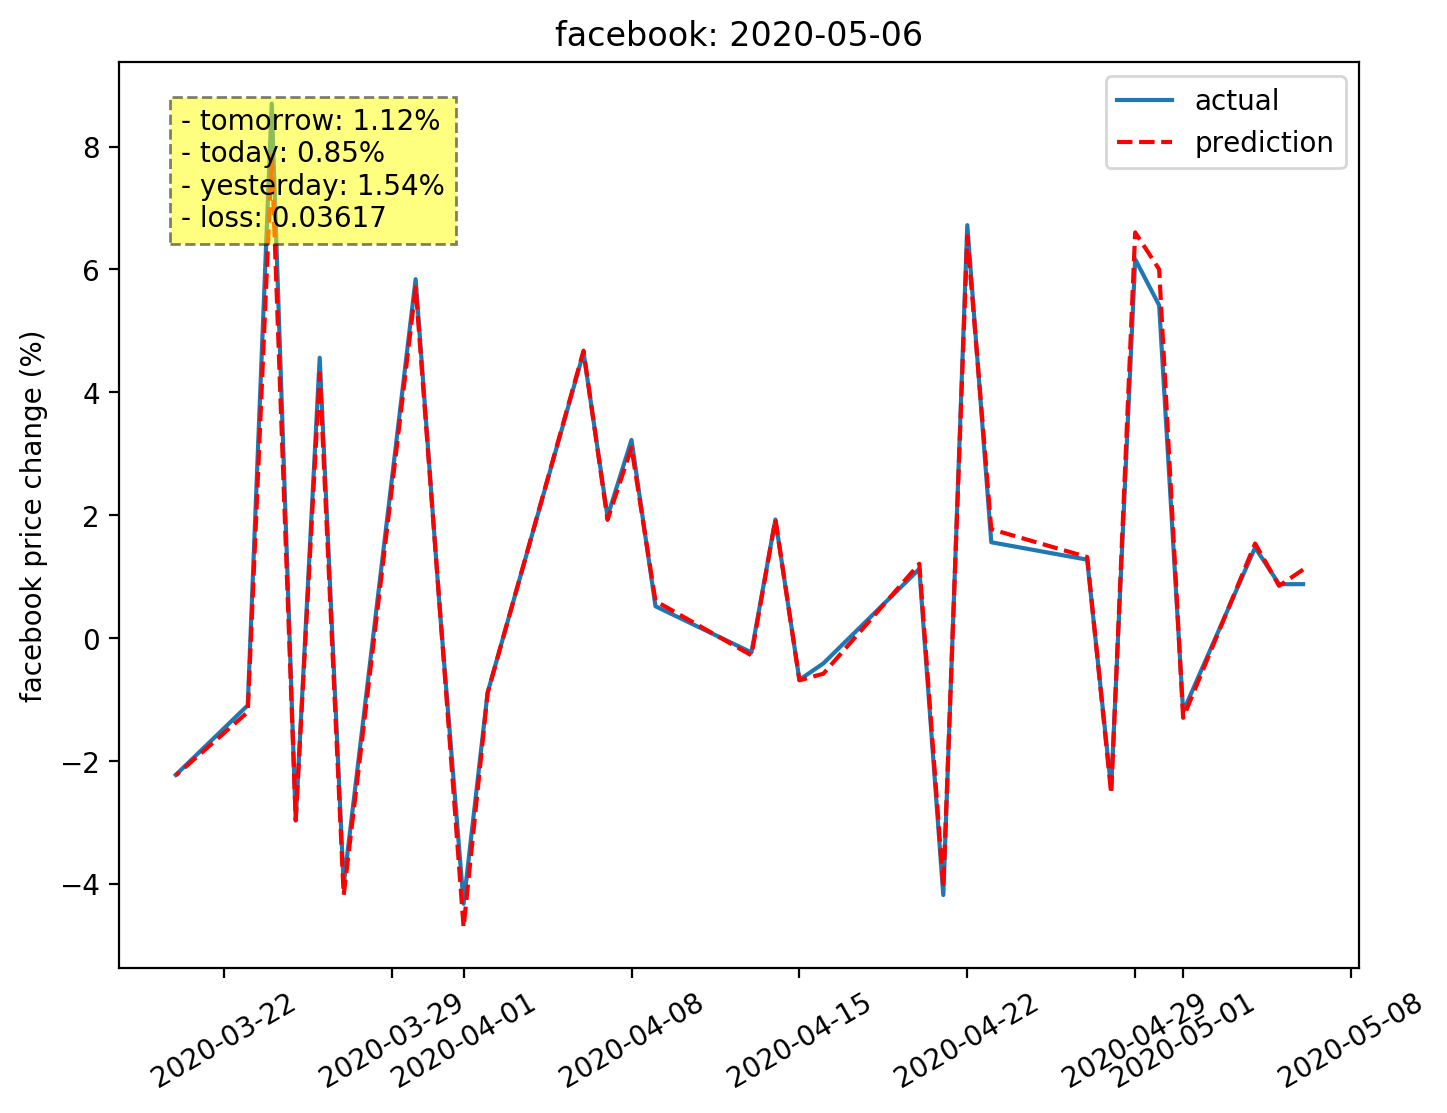

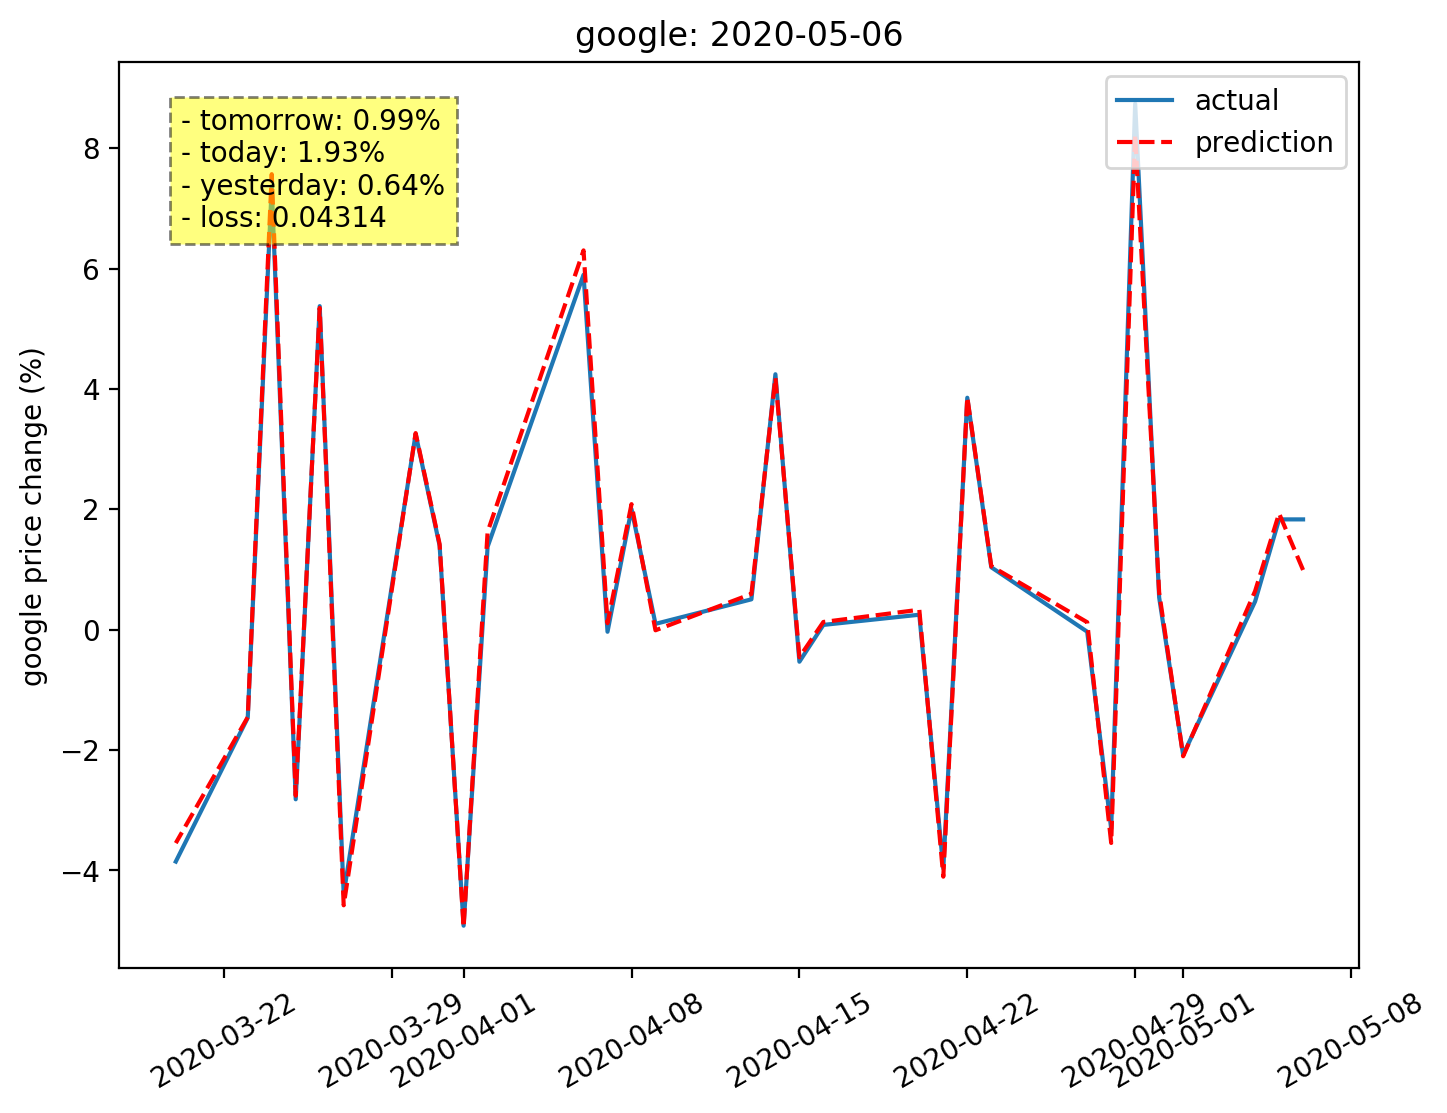

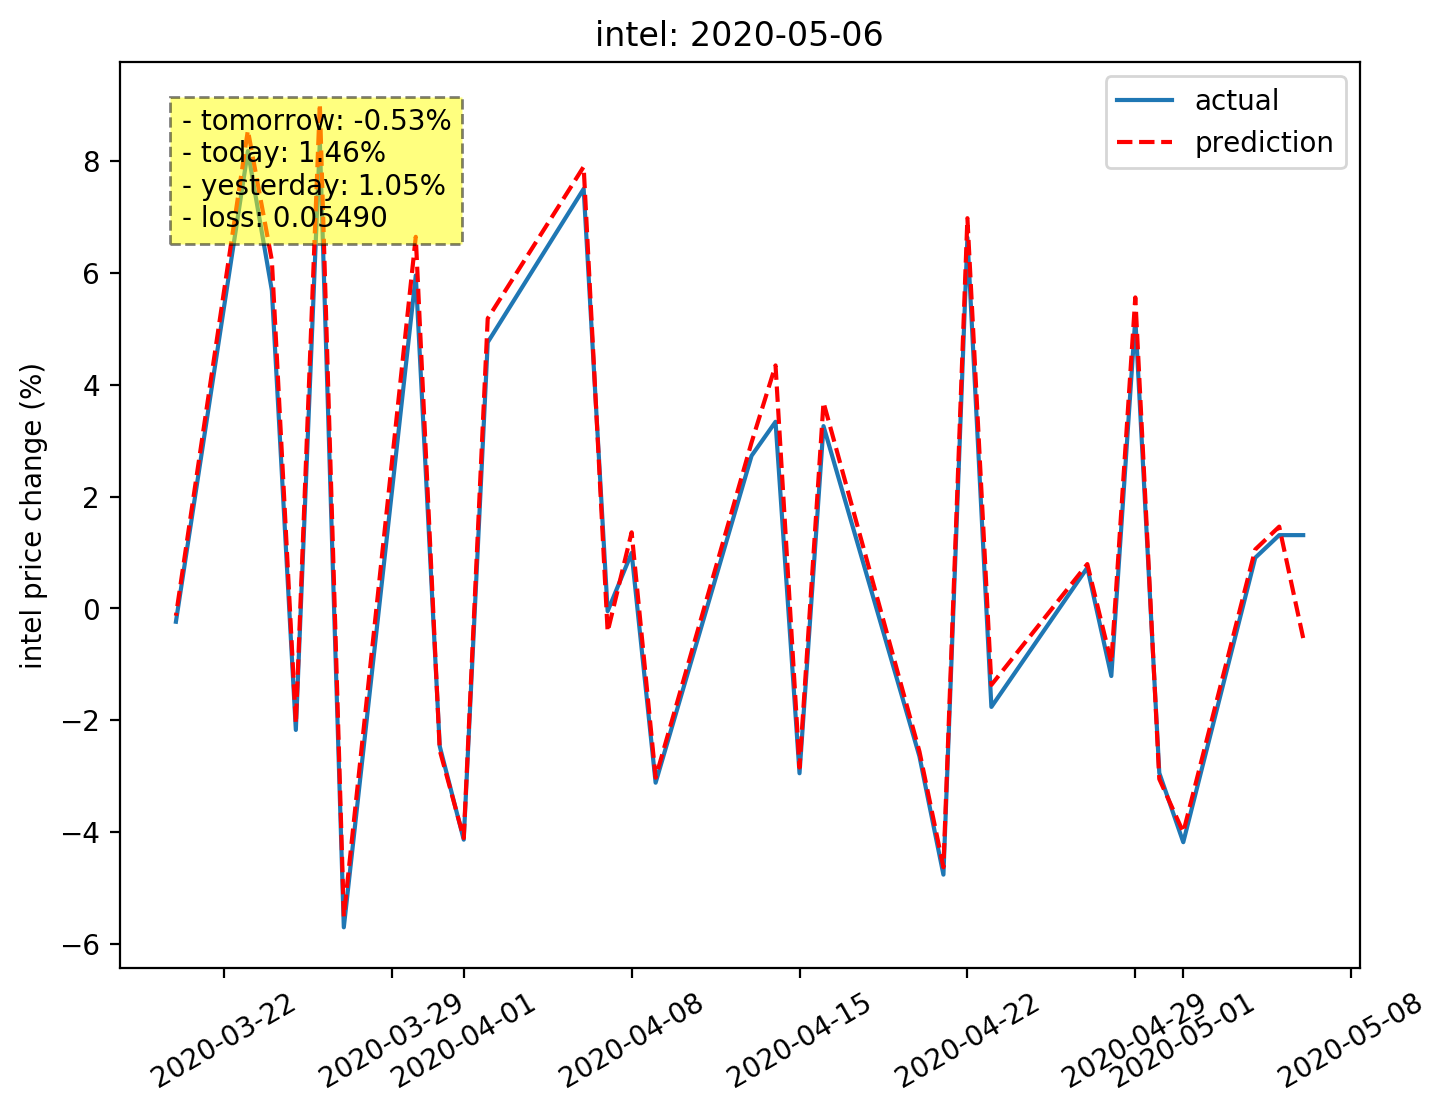

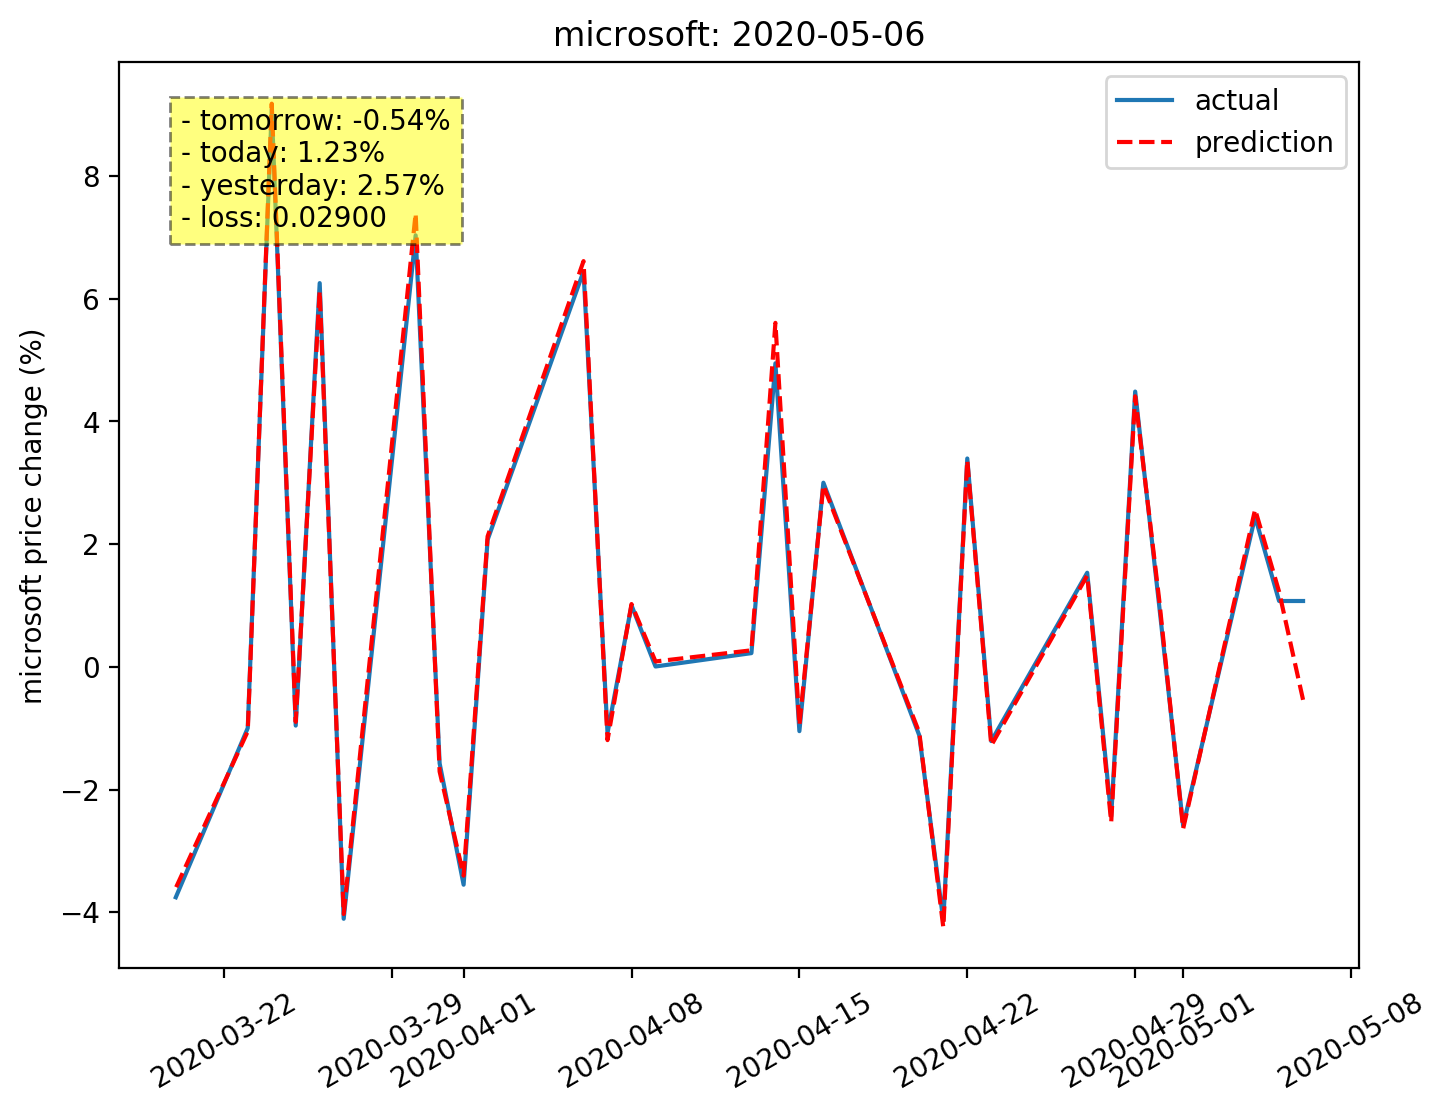

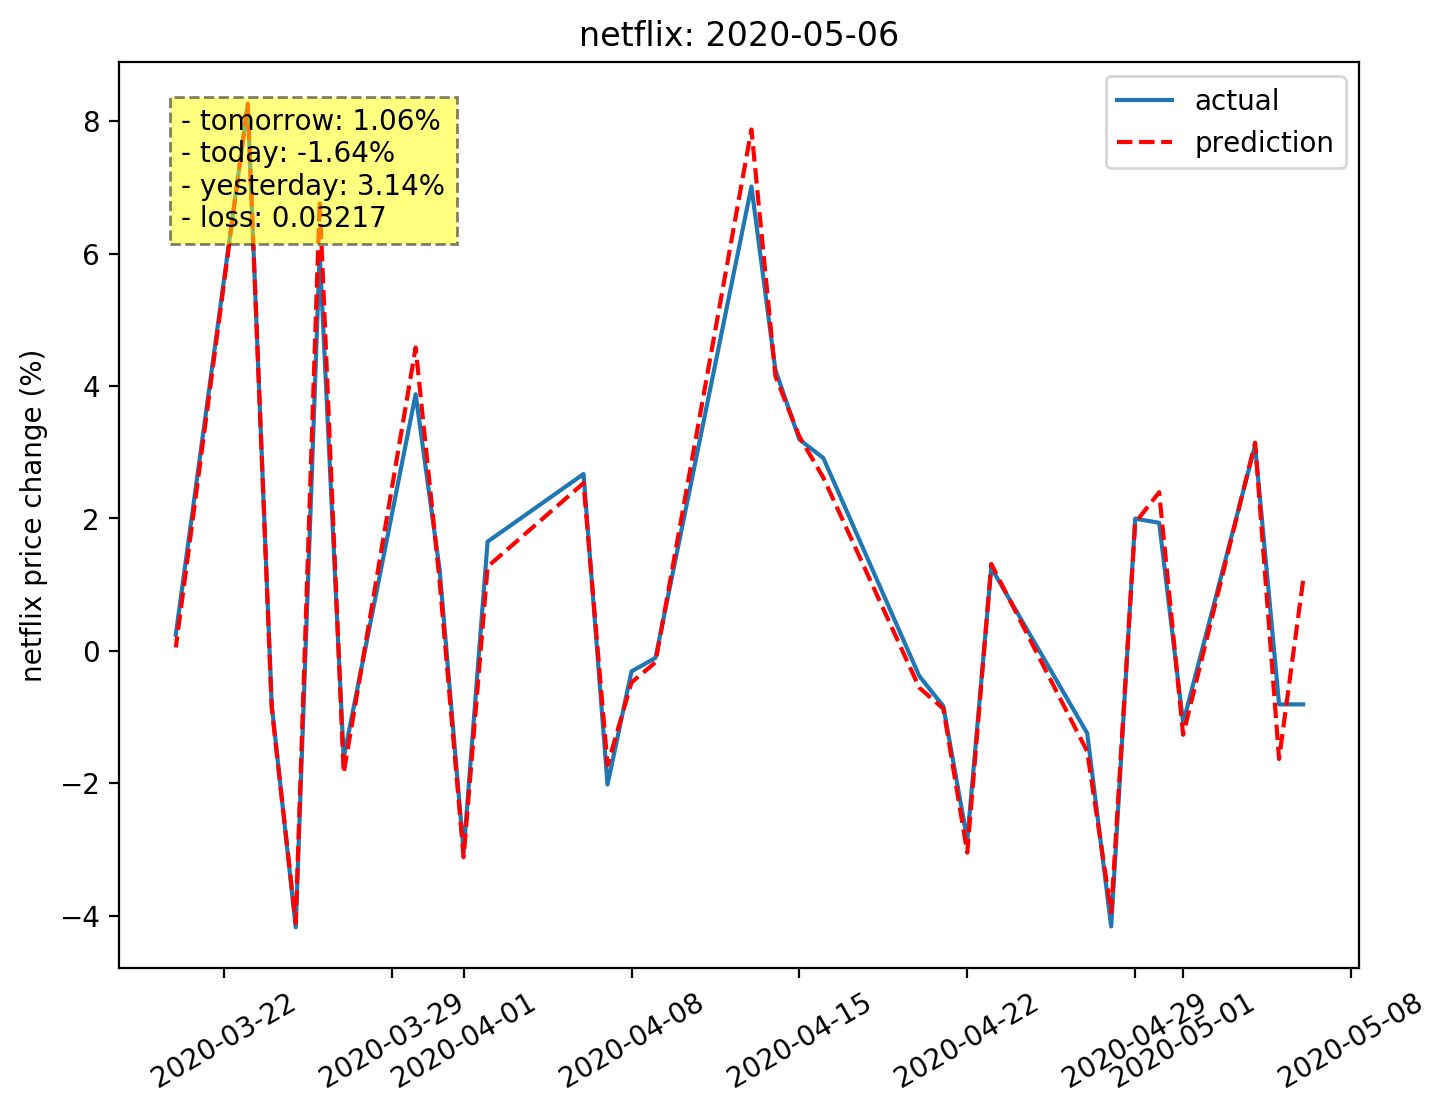

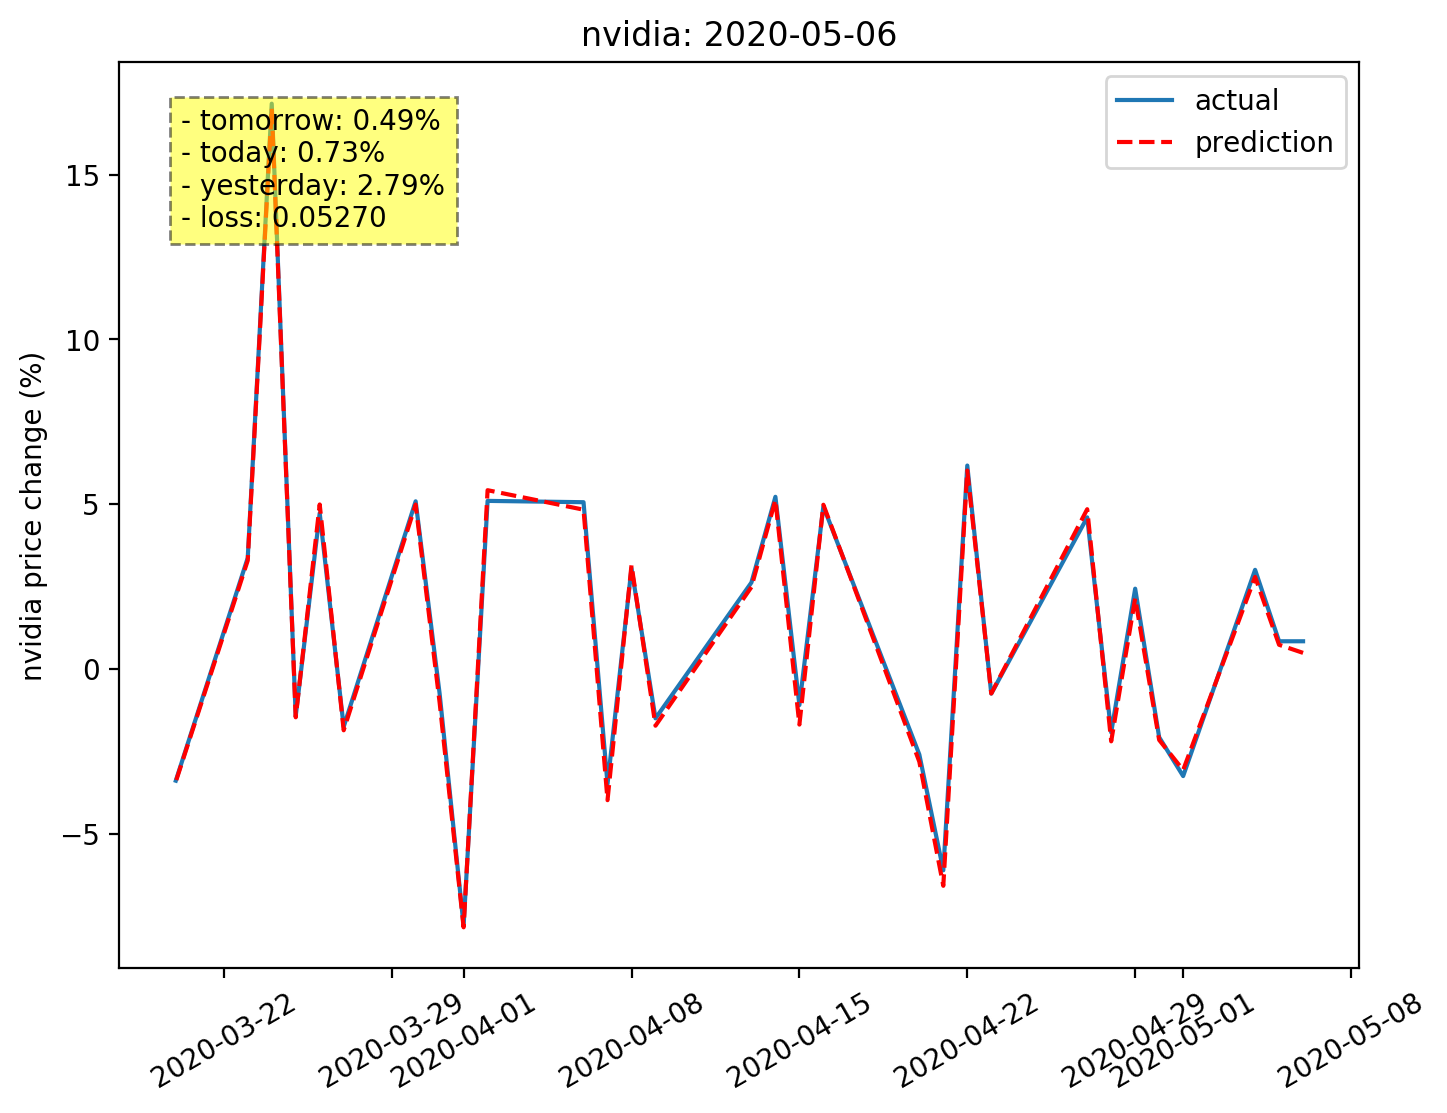

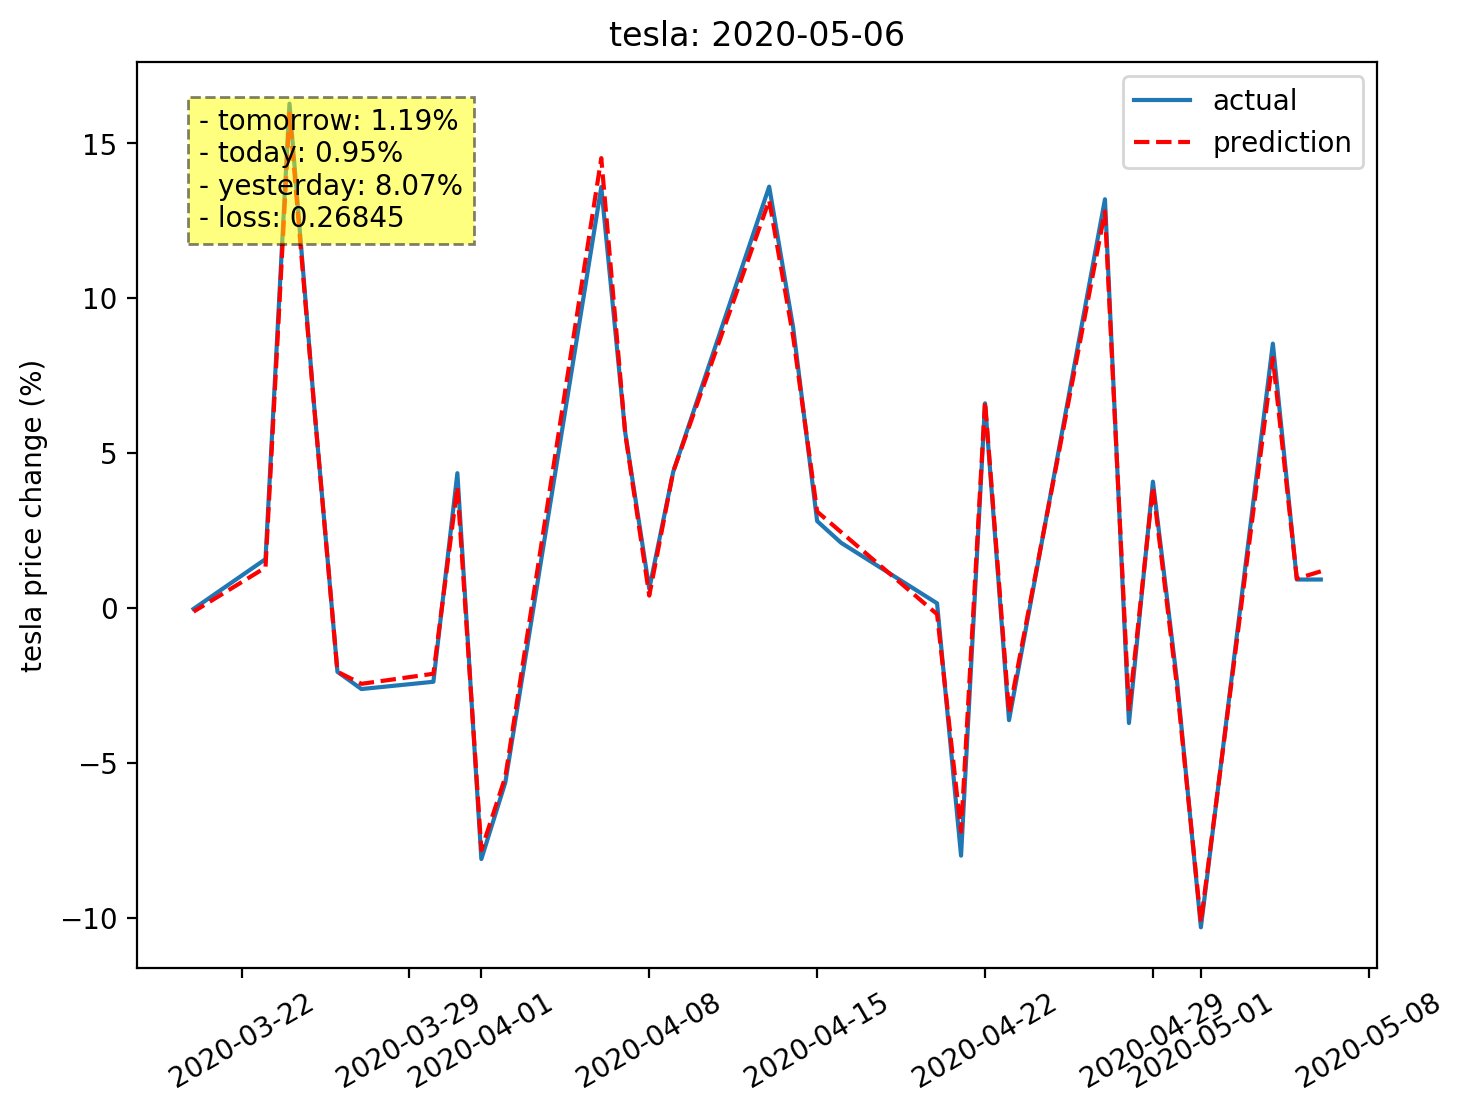

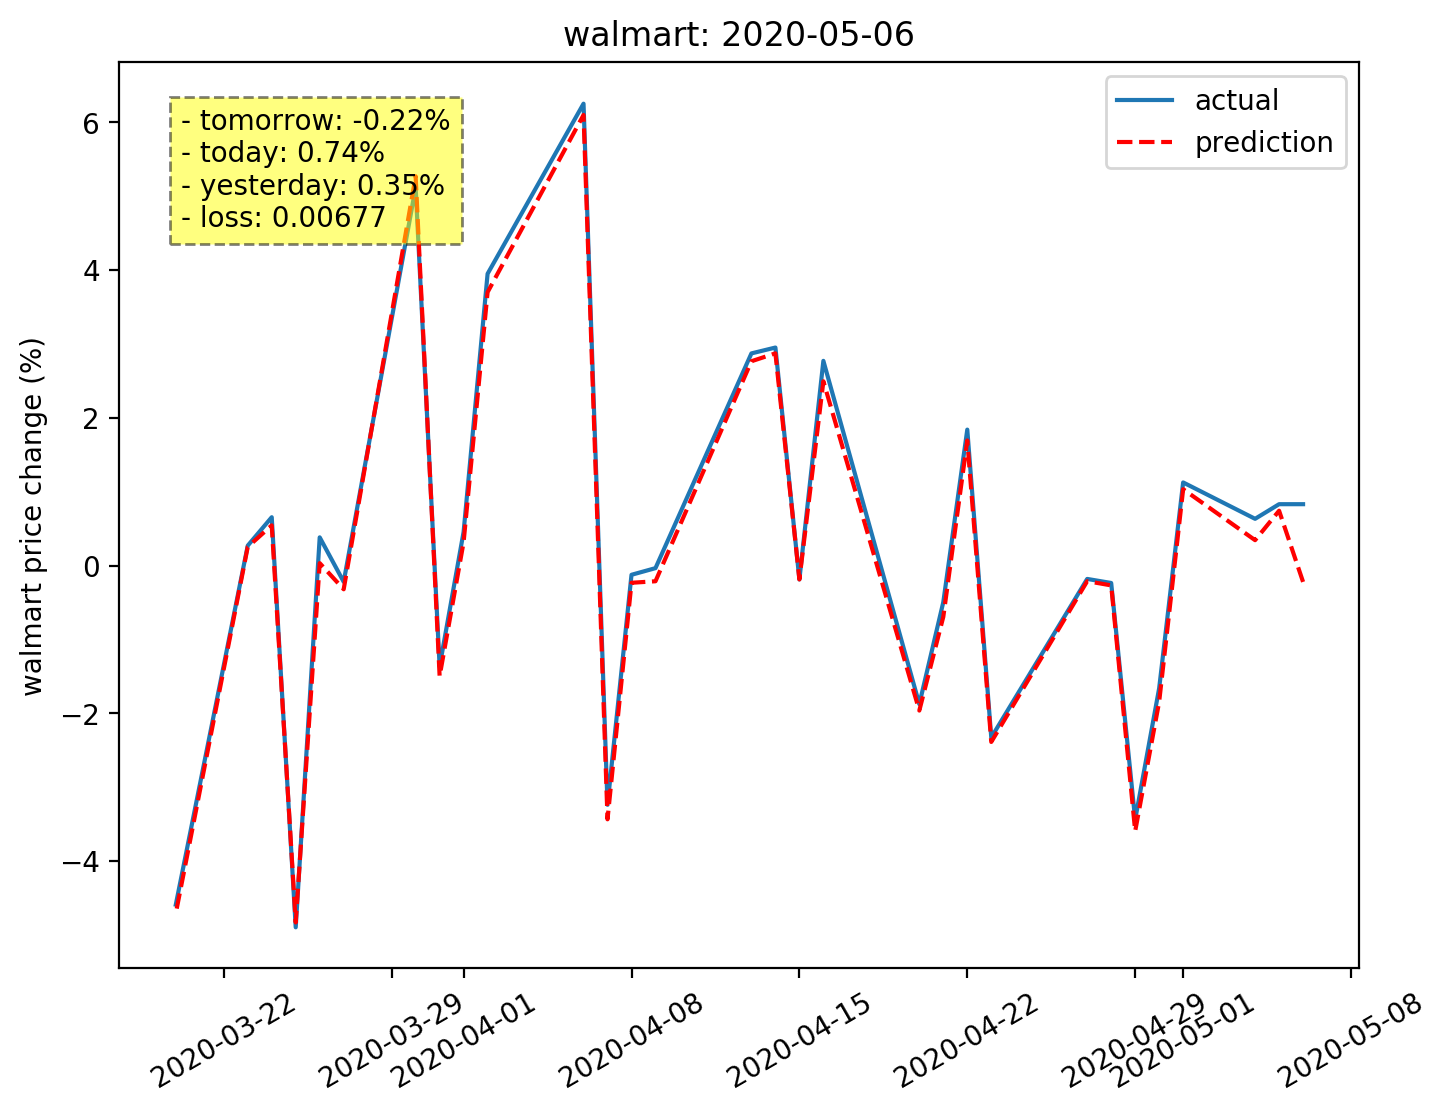

In [2]:
# preprocessing #takeout hynix and merge with index
df_stocks = pd.read_csv('./yahoo/stock_combined.csv')
stock = df_stocks.columns[1:] # list of the stock names  
df_pred = pd.DataFrame() # dummy frame

for j in range(len(stock)):
    
    # Hyper-parameters 
    num_epochs = 50
    batch_size = 500
    tracking_day = 30
    learning_rate = 0.0005
    h1 = 500
    h2 = 500
    h3 = 500
    h4 = 500
    no = 1

    name = stock[j]
    df_stock = df_stocks[['date',name]] #--------------->>> need to plug the number i for iteration 
    df_index = pd.read_csv('./yahoo/index_combined.csv')
    df = pd.merge(df_stock, df_index, "inner")
    #pop df_date
    df_date = df.pop('date')
    #make df_pct
    df_pct = df.pct_change(-1)*100
    df_pct['date'] = df_date
    df_pct = df_pct.dropna()
    # scale for x (=df_pct) #scikit learn scaler
    scaler = MinMaxScaler((-1,1)) 
    scaler.fit(df_pct)
    xy = scaler.transform(df_pct)
    xy[:,0] = df_pct.values[:,0] #revoke y values
    xy = xy[:,:-1] #remove date
    
    # Load data
    dataset = TrainDataset(xy,tracking_day)
    dataloader = DataLoader(dataset = dataset, batch_size = batch_size, 
                            shuffle=True)#, num_workers=2)

    # number of input neurons (automated)
    ni = tracking_day*dataset.x.shape[2]
    # Model create
    model = NeuralNet(ni, h1, h2, h3, h4, no)
    # Loss
    criterion = nn.SmoothL1Loss()
    # criterion = nn.MSELoss()
    #optimizer
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    # training loop
    n_total_steps = len(dataloader) # len(y)/batch_size (ex. 1318/100 => 14 loads)
    for epoch in range(num_epochs):
        model.train()

        for i, (x,y) in enumerate(dataloader):
            # [100, 80, 7] --> [100, 80*7]  // y= [100, 1]
            x = x.reshape(x.shape[0], -1).to(device)
            y = y.to(device)
            #Forward
            y_pred = model(x)
            loss = criterion(y_pred, y)
            #Backward
            optimizer.zero_grad() #gradient clear
            loss.backward() #back propagation
            optimizer.step() #update weights

            if (epoch+1) % 10 ==0: 
                if (i+1) % 1 == 0:
                    print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.5f}')

    # save and load entire model
    FILE = f'./save/model_{name}.pth'
    torch.save(model, FILE)


    # Load TestDataset
    testset = TestDataset(xy,tracking_day)
    x1 = testset.x
    x1 = x1.reshape(x1.shape[0],-1)
    y1 = testset.y
    y1_pred = model(x1)
    
    # build df_pred
    df_pct1 = df_pct.head(1)
    df_pct = pd.concat([df_pct, df_pct1]).sort_index().reset_index(drop=True)
    df_pct.date.iloc[0] = df_pct.date.iloc[0]+1
    df_pct = df_pct [:-1]
    df_pct['datetime'] = df_pct['date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
    df_pct['pred'] = y1_pred.squeeze().tolist()

    # Visualize
    from datetime import date
    import os
    
    today = date.today()

    fig = plt.figure(figsize=(8,6), dpi=200)
    ax = fig.add_subplot(111)
    no=30
    ax.plot(df_pct.datetime[:no],df_pct[f'{name}'][:no],label = 'actual')
    ax.plot(df_pct.datetime[:no],df_pct.pred[:no],'r--',label = 'prediction')

    ax.legend(loc=1)
    ax.set_ylabel(f'{name} price change (%)')
    ax.set_title(f'{name}: {today}')
    plt.xticks(rotation=30)
    
    # save prediction in dataframe df_pred
    pct = y1_pred.data.squeeze().tolist()[:5]
    df_single = pd.DataFrame(pct,columns=[f'{name}'])
    df_pred = pd.concat([df_pred,df_single],axis=1)
    
    ax.text(0.05, 0.95, 
            f'- tomorrow: {df_pct.pred[0]:2.2f}%\n- today: {df_pct.pred[1]:2.2f}%\n- yesterday: {df_pct.pred[2]:2.2f}%\n- loss: {loss.item():.5f}'
            , ha='left', va='top', transform=ax.transAxes,  bbox=dict(facecolor='yellow', alpha=0.5, ls='--'))
    
    os.makedirs(f'./result/usa/{today}', exist_ok=True) ##5/5 added
    fig.savefig(f'./result/usa/{today}/{today}_{name}')


df_pred['datetime'] = df_pct.datetime
df_pred.set_index('datetime', inplace=True)  ## 5/5 added
# del df_pred.index.name
df_pred.to_csv(f'./result/usa/{today}/sum.csv')
df_pred.round(2)

In [4]:
df_pred

,amazon,apple,cocacola,facebook,google,intel,microsoft,netflix,nvidia,tesla,walmart
2020-05-06,1.664400,0.043236,-0.697013,1.118939,0.991861,-0.531311,-0.537149,1.056362,0.488919,1.186561,-0.219211
2020-05-05,0.105753,1.472188,0.701357,0.854975,1.931565,1.462338,1.225433,-1.635337,0.734075,0.949337,0.744161
2020-05-04,1.586713,1.349036,-1.082365,1.542920,0.640486,1.053894,2.566480,3.144090,2.793864,8.071785,0.345674
2020-05-01,-7.143153,-1.644504,-0.608518,-1.292190,-2.103442,-4.006774,-2.638761,-1.269833,-3.067888,-10.149191,1.035562
2020-04-30,4.518889,2.022068,-2.720838,6.002296,0.617895,-3.053349,1.098548,2.394261,-2.153251,-2.516812,-1.841861
